In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("abc.csv")


In [ ]:
df.shape


(26052, 7)

In [ ]:
df.size


182364

In [ ]:
df.dtypes


index         int64
City         object
Date         object
Card Type    object
Exp Type     object
Gender       object
Amount        int64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')


In [ ]:
df.dtypes


index                 int64
City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
dtype: object

In [ ]:
df.head(20)


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
5,5,"Delhi, India",2014-09-08,Silver,Bills,F,100036
6,6,"Delhi, India",2015-02-24,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",2014-06-26,Platinum,Bills,F,150980
8,8,"Delhi, India",2014-03-28,Silver,Bills,F,192247
9,9,"Delhi, India",2014-09-01,Platinum,Bills,F,67932


In [ ]:
df.isnull()


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
26047,False,False,False,False,False,False,False
26048,False,False,False,False,False,False,False
26049,False,False,False,False,False,False,False
26050,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [ ]:
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [ ]:
df.dtypes


index                 int64
City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
dtype: object

In [ ]:
df.info


<bound method DataFrame.info of        index                   City       Date  Card Type Exp Type Gender  \
0          0           Delhi, India 2014-10-29       Gold    Bills      F   
1          1  Greater Mumbai, India 2014-08-22   Platinum    Bills      F   
2          2       Bengaluru, India 2014-08-27     Silver    Bills      F   
3          3  Greater Mumbai, India 2014-04-12  Signature    Bills      F   
4          4       Bengaluru, India 2015-05-05       Gold    Bills      F   
...      ...                    ...        ...        ...      ...    ...   
26047  26047         Kolkata, India 2014-06-22     Silver   Travel      F   
26048  26048            Pune, India 2014-08-03  Signature   Travel      M   
26049  26049       Hyderabad, India 2015-01-16     Silver   Travel      M   
26050  26050          Kanpur, India 2014-09-14     Silver   Travel      M   
26051  26051       Hyderabad, India 2013-10-19  Signature    Bills      M   

       Amount  
0       82475  
1       325

In [ ]:
df.describe


<bound method NDFrame.describe of        index                   City       Date  Card Type Exp Type Gender  \
0          0           Delhi, India 2014-10-29       Gold    Bills      F   
1          1  Greater Mumbai, India 2014-08-22   Platinum    Bills      F   
2          2       Bengaluru, India 2014-08-27     Silver    Bills      F   
3          3  Greater Mumbai, India 2014-04-12  Signature    Bills      F   
4          4       Bengaluru, India 2015-05-05       Gold    Bills      F   
...      ...                    ...        ...        ...      ...    ...   
26047  26047         Kolkata, India 2014-06-22     Silver   Travel      F   
26048  26048            Pune, India 2014-08-03  Signature   Travel      M   
26049  26049       Hyderabad, India 2015-01-16     Silver   Travel      M   
26050  26050          Kanpur, India 2014-09-14     Silver   Travel      M   
26051  26051       Hyderabad, India 2013-10-19  Signature    Bills      M   

       Amount  
0       82475  
1       3

<Axes: xlabel='Card Type', ylabel='Amount'>

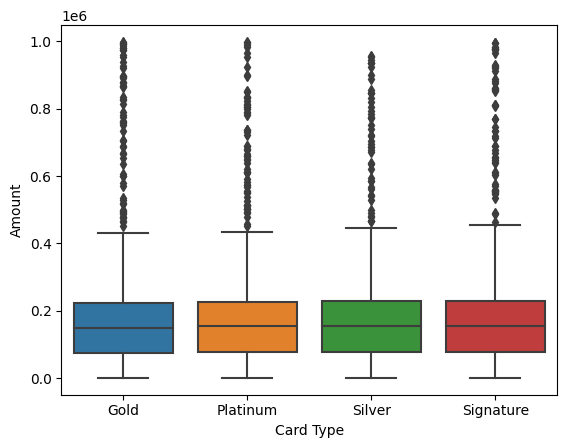

In [ ]:
sns.boxplot(x="Card Type",y="Amount",hue_order="Card Type",data=df)

In [ ]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
print("Original dataset size:", len(df))
print("Cleaned dataset size:", len(filtered_data))
filtered_data.to_csv('cleaned_transactions.csv', index=False)

Original dataset size: 26052
Cleaned dataset size: 25823


<Axes: xlabel='Card Type', ylabel='Amount'>

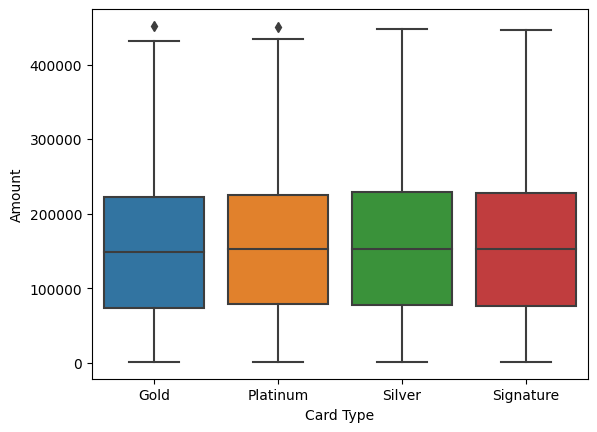

In [ ]:
sns.boxplot(x="Card Type",y="Amount", data=filtered_data)

In [ ]:
filtered_data.shape


(25823, 7)

<Axes: xlabel='Card Type', ylabel='Amount'>

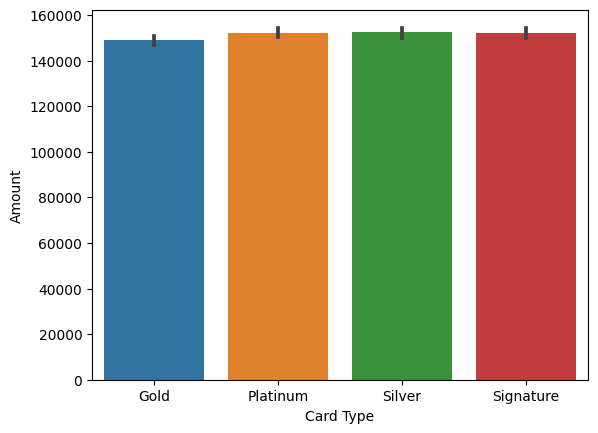

In [ ]:
sns.barplot(x="Card Type",y="Amount",data=filtered_data)

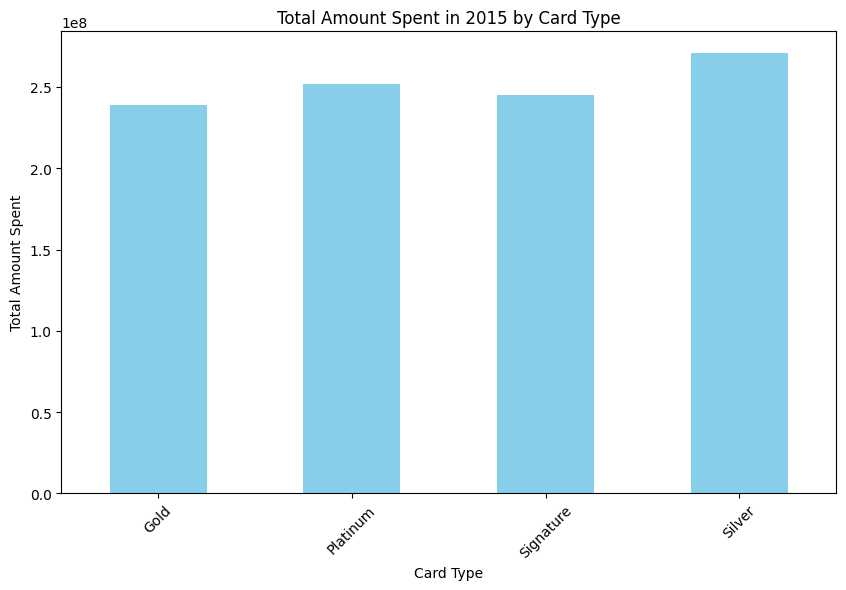

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_2015 = df[df['Date'].dt.year == 2015]

# Group the data by 'Card Type' and calculate the total amount spent
total_amount_by_card_type = df_2015.groupby('Card Type')['Amount'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
total_amount_by_card_type.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent in 2015 by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


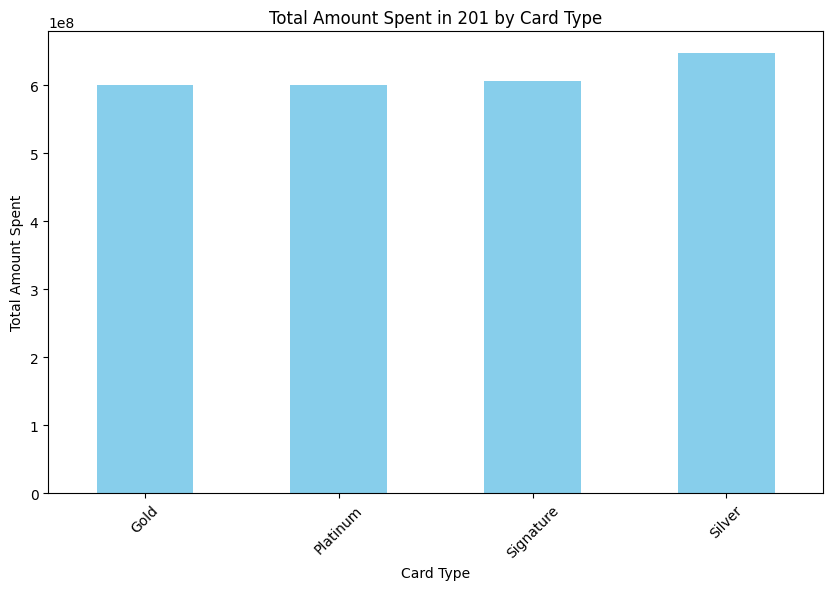

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_2016 = df[df['Date'].dt.year == 2014]

# Group the data by 'Card Type' and calculate the total amount spent
total_amount_by_card_type = df_2016.groupby('Card Type')['Amount'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
total_amount_by_card_type.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent in 201 by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



<Axes: xlabel='Card Type', ylabel='count'>

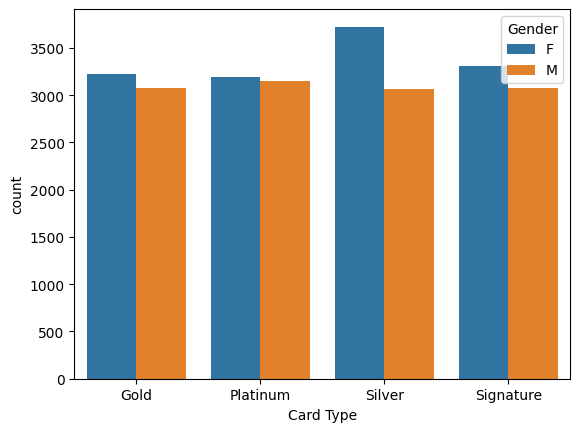

In [ ]:
sns.countplot(x="Card Type",hue="Gender",data=filtered_data)


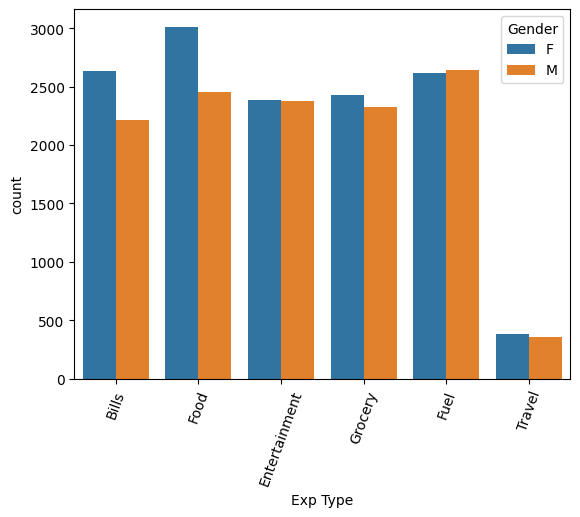

In [ ]:
sns.countplot(x ="Exp Type",hue="Gender",data=filtered_data)
plt.xticks(rotation=70)
plt.show()


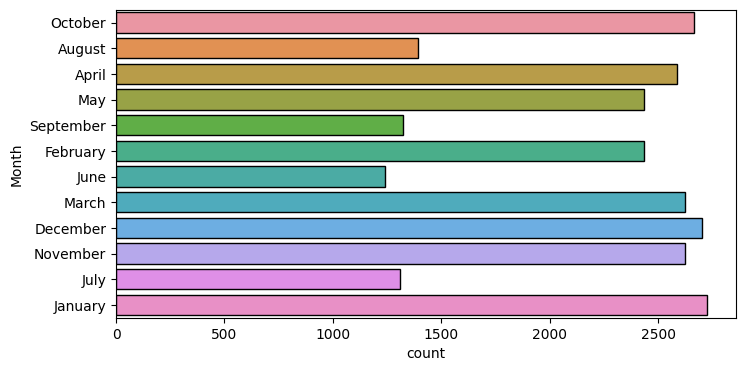

In [ ]:
df["Month"] = df["Date"].dt.month_name()
p_mnth = df["Month"].value_counts()
p_mnth
plt.figure(figsize=(8,4))
sns.countplot(y="Month",data=df,edgecolor="black")
plt.show()


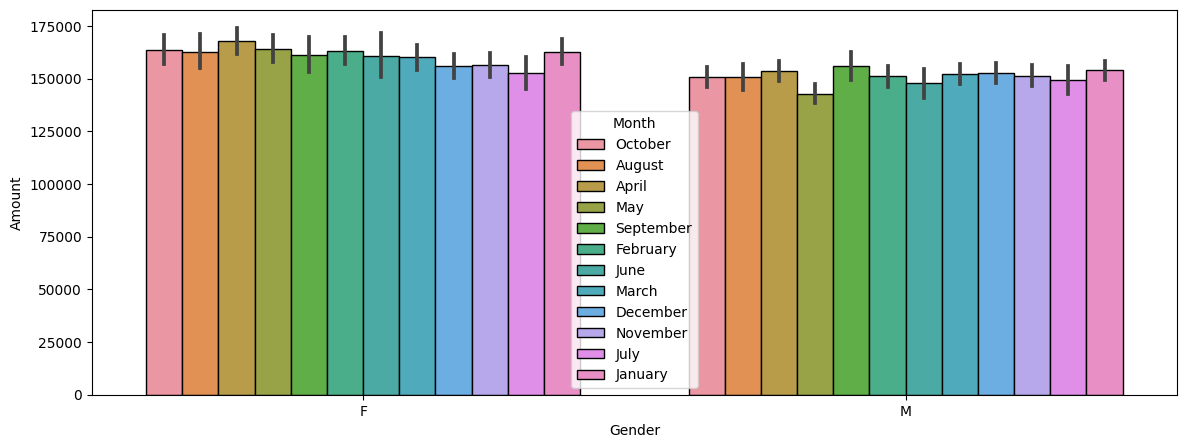

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x="Gender",y="Amount",hue="Month",data=df,edgecolor="black")
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

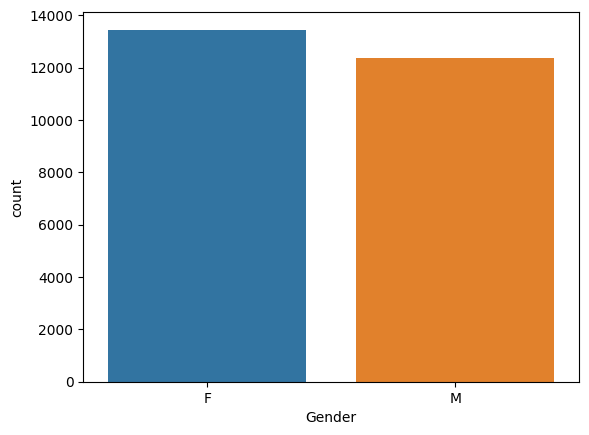

In [ ]:
sns.countplot(x="Gender",data=filtered_data)


<Axes: xlabel='Exp Type', ylabel='count'>

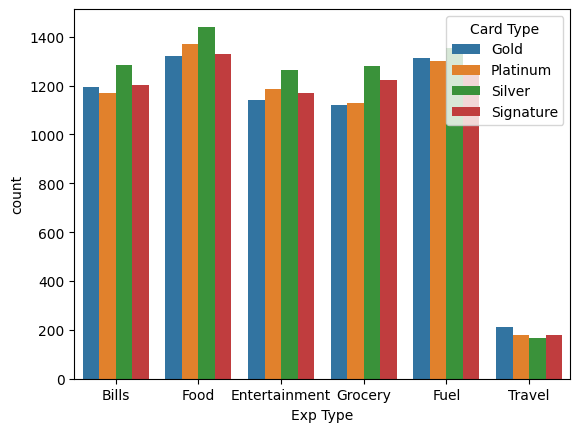

In [ ]:
sns.countplot(x="Exp Type",hue="Card Type",data=filtered_data)


<ipython-input-68-6b46032c581c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = filtered_data.resample('15D', on='Date').sum()


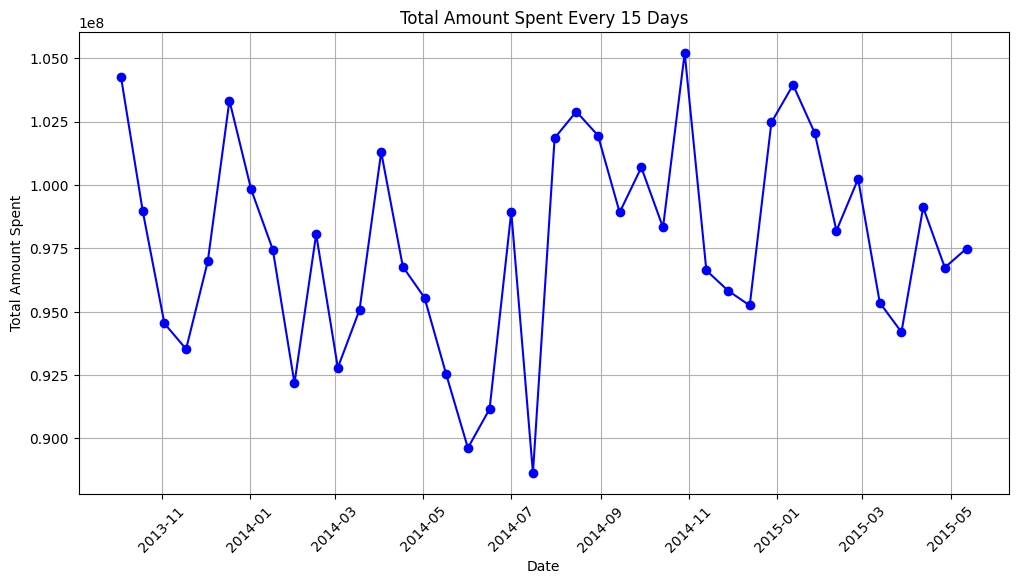

In [ ]:

daily_data = filtered_data.resample('15D', on='Date').sum()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Amount'], marker='o', linestyle='-', color='b')
plt.title('Total Amount Spent Every 15 Days')
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [ ]:

filtered_data.sort_values(by='Date', inplace=True)
filtered_data.reset_index(drop=True, inplace=True)
filtered_data = filtered_data.groupby('Date')['Amount'].sum().reset_index()

<ipython-input-69-b32fd9bed1d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values(by='Date', inplace=True)


In [ ]:
filtered_data.head(10)

,Date,Amount
0,2013-10-04,7462236
1,2013-10-05,7450060
2,2013-10-06,6312401
3,2013-10-07,6925913
4,2013-10-08,4932432
5,2013-10-09,8956646
6,2013-10-10,6401086
7,2013-10-11,8370045
8,2013-10-12,8361607
9,2013-10-13,8728313


In [ ]:

# Get the number of samples in your dataset
num_samples = len(filtered_data)

# Calculate the number of samples for training and testing
num_train_samples = int(0.8 * num_samples)
num_test_samples = num_samples - num_train_samples

# Split the dataset into training and testing sets
train_data = filtered_data[:num_train_samples]
test_data = filtered_data[num_train_samples:]
# Assuming you have a DataFrame called 'test_data'
test_data = test_data.rename(columns={'Date': 'ds', 'Amount': 'y'})


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


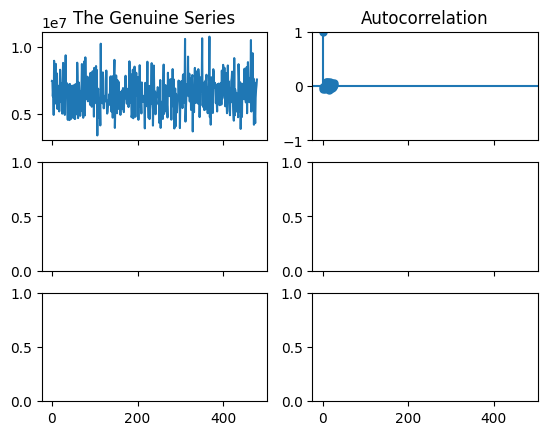

In [ ]:
fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(train_data['Amount'])
axes[0, 0].set_title('The Genuine Series')
plot_acf(train_data['Amount'], ax = axes[0, 1]);

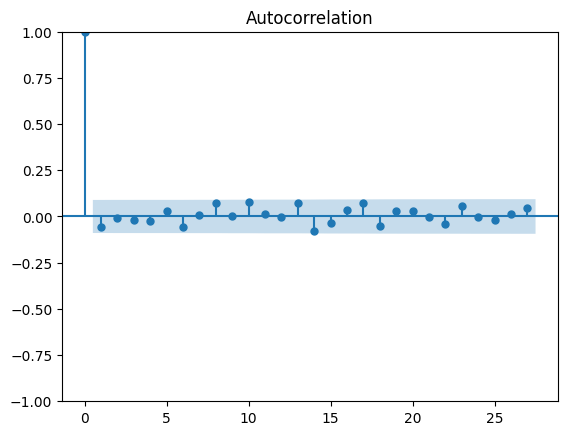

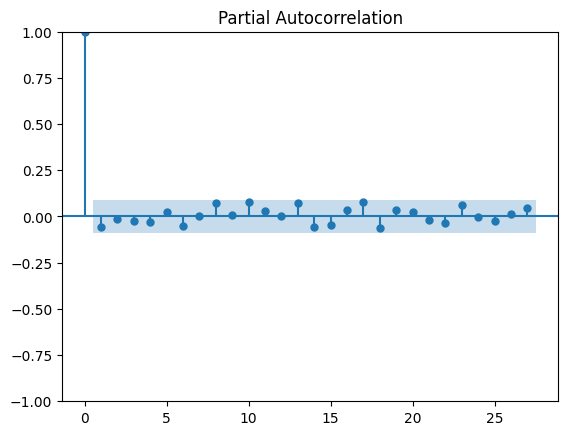

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Optimal (p, d, q) values: (2, 1, 2)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prepare the data
dates = pd.to_datetime(train_data['Amount'])
values =train_data['Amount']
series = pd.Series(values.values, index=dates)

# Determine the optimal values for p and q using ACF and PACF plots
plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()

# Grid search to find the optimal values for p, d, and q
best_aic = np.inf
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue
print(f"Optimal (p, d, q) values: {best_order}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data
dates = pd.to_datetime(train_data['Amount'])
values = train_data['Amount']
series = pd.Series(values.values, index=dates)

# Fit the ARIMA model
order = (2,1,2)
model = ARIMA(train_data['Amount'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 39 values
forecast = model_fit.forecast(steps=39)

# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  480
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7407.980
Date:                Sat, 07 Oct 2023   AIC                          14825.960
Time:                        13:12:46   BIC                          14846.819
Sample:                             0   HQIC                         14834.160
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0260      0.060    -17.176      0.000      -1.143      -0.909
ar.L2         -0.0748      0.055     -1.355      0.175      -0.183       0.033
ma.L1         -0.0131      0.035     -0.379      0.7

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

In [ ]:
mae = mean_absolute_error(train_data['Amount'], predictions)
print("MAE:", mae)
mape = mean_absolute_percentage_error(train_data['Amount'],predictions) * 100
print("MAPE:", mape)

MAE: 1015949.5752081128
MAPE: 16.26659310336885


In [ ]:
forecast = model_fit.forecast(steps=len(test_data))

# Extract the actual values from your test_data
actual_values = test_data['y'].values

# Calculate MAE and MAPE between test_data and predicted values
mae = mean_absolute_error(actual_values, forecast)
mape = mean_absolute_percentage_error(actual_values, forecast) * 100

print("MAE:", mae)
print("MAPE:", mape)

MAE: 918595.5430557006
MAPE: 15.17505453634192


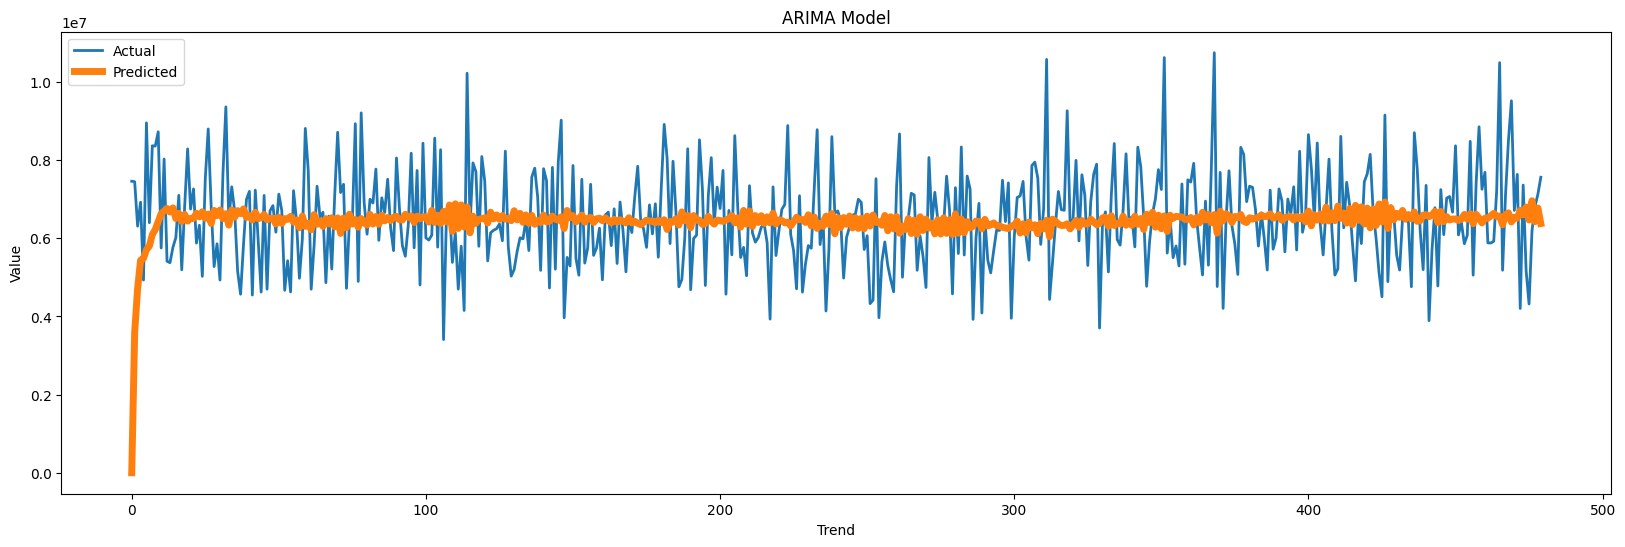

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data['y'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=5)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()

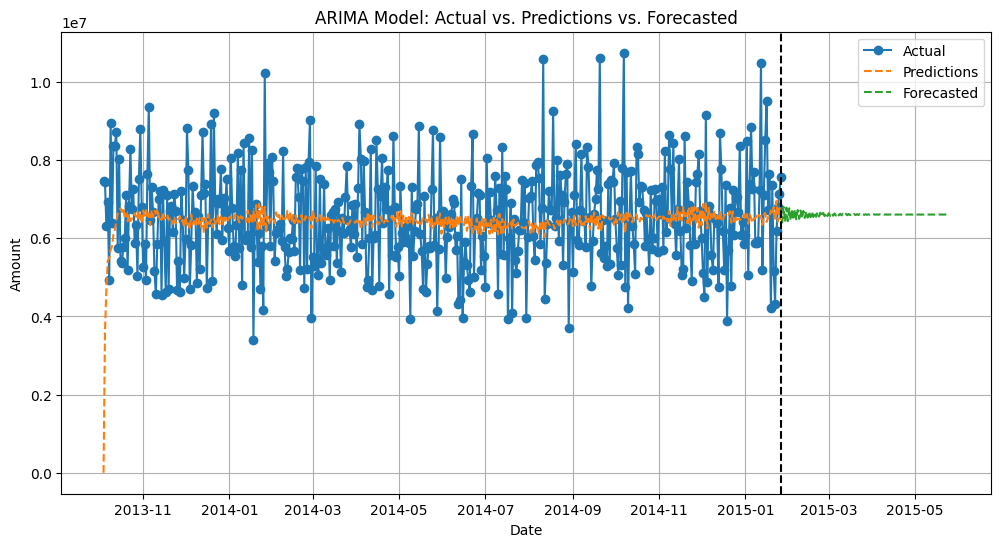

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Actual', marker='o')

# Plot the predictions (in-sample)
plt.plot(train_data['ds'], predictions, label='Predictions', linestyle='--')

# Plot the forecasted values (out-of-sample) starting where predicted ends
forecast_dates = pd.date_range(start=train_data['ds'].max(), periods=len(forecast), freq='D')
plt.plot(forecast_dates, forecast, label='Forecasted', linestyle='--')

# Add a vertical line to connect the predicted and forecasted values
end_of_predictions = train_data['ds'].max()
start_of_forecast = forecast_dates[0]
plt.axvline(x=end_of_predictions, color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('ARIMA Model: Actual vs. Predictions vs. Forecasted')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
from itertools import product

p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 1
Q = range(0, 3, 1)
s = 3
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))



81


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.notebook import tqdm_notebook
result_df = optimize_SARIMA(parameters_list, 2, 1, 2, train_data['Amount'])
result_df

  0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

,"(p,q)x(P,Q)",AIC
0,"(1, 2, 2, 0)",15109.858659
1,"(2, 1, 0, 2)",15110.544062
2,"(1, 2, 1, 0)",15121.767493
3,"(2, 1, 0, 1)",15127.055751
4,"(2, 0, 0, 2)",15171.306156
5,"(2, 2, 0, 0)",15182.765212
6,"(0, 2, 2, 0)",15202.805457
7,"(0, 2, 1, 0)",15210.983142
8,"(2, 1, 0, 0)",15232.746354
9,"(1, 1, 0, 2)",15242.124826


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
best_model = SARIMAX(train_data['Amount'], order=(2, 1, 2), seasonal_order=(1, 2, 2, 12))
results = best_model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                             Amount   No. Observations:                  480
Model:             SARIMAX(2, 1, 2)x(1, 2, 2, 12)   Log Likelihood               -7300.179
Date:                            Sat, 07 Oct 2023   AIC                          14616.359
Time:                                    13:17:24   BIC                          14649.321
Sample:                                         0   HQIC                         14629.344
                                            - 480                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0429      0.318     -3.282      0.001      -1.666      -0.420
ar.L2         -0.0876      0.266   

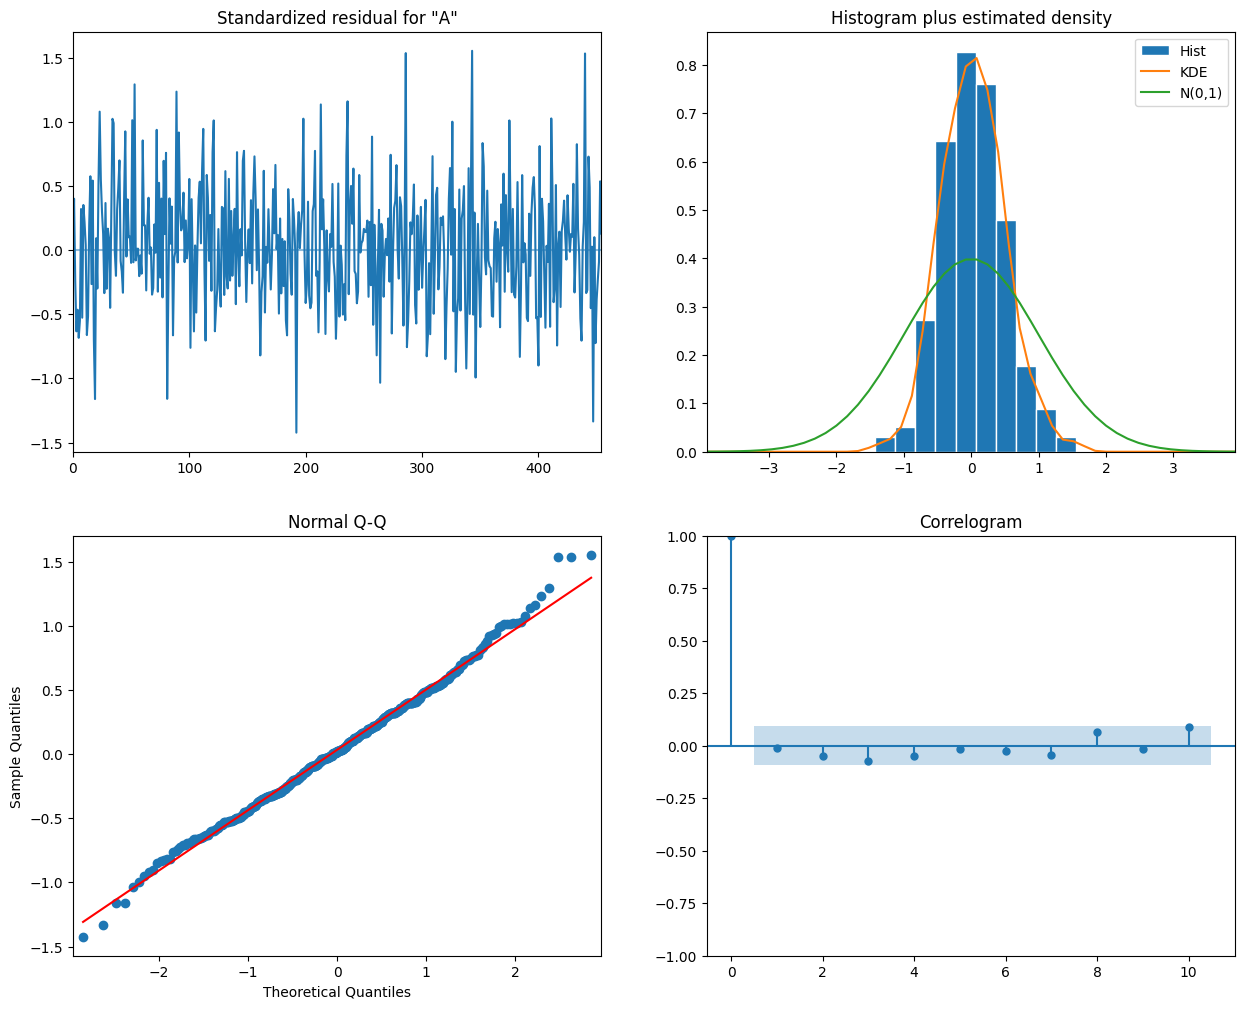

In [ ]:
results.plot_diagnostics(figsize=(15,12));

In [ ]:
forecasted_values = results.get_forecast(steps=36)

In [ ]:
print(forecasted_values.predicted_mean)

480    6.764068e+06
481    8.237379e+06
482    7.330344e+06
483    6.975599e+06
484    6.460169e+06
485    6.796896e+06
486    6.320187e+06
487    4.804552e+06
488    6.686087e+06
489    7.407128e+06
490    6.139518e+06
491    7.554899e+06
492    6.878297e+06
493    8.492069e+06
494    7.465252e+06
495    7.046363e+06
496    6.375853e+06
497    6.857209e+06
498    6.148046e+06
499    4.568008e+06
500    6.679332e+06
501    7.601806e+06
502    6.152747e+06
503    7.688608e+06
504    6.963290e+06
505    8.718824e+06
506    7.618414e+06
507    7.100945e+06
508    6.337053e+06
509    6.903687e+06
510    6.005349e+06
511    4.338592e+06
512    6.689015e+06
513    7.799437e+06
514    6.159261e+06
515    7.817637e+06
Name: predicted_mean, dtype: float64


In [ ]:


mae = mean_absolute_error(train_data['Amount'].tail(36), forecasted_values.predicted_mean)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((train_data['Amount'].tail(36) - forecasted_values.predicted_mean) / train_data['Amount'].tail(36))) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 958507.3072693122
Mean Absolute Percentage Error (MAPE): nan


In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error, r2_score

# Rename the columns to 'ds' and 'y' for the time series data and target variable
#dftrainnew = dftrainnew.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
train_data = train_data.rename(columns={'Date': 'ds', 'Amount':'y'})

# Initialize the Prophet model
model = Prophet(weekly_seasonality=True)
model.add_seasonality(name='weekly', period=7, fourier_order=3)  # Example: Weekly seasonality with period 7


# Fit the model to the data
model.fit(train_data)

# Make predictions
forecast = model.predict()

actual_values = train_data['y'].values
predicted_values = forecast['yhat'].values

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgufxak5q/0dr3s6ds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgufxak5q/qqe6ntpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37292', 'data', 'file=/tmp/tmpgufxak5q/0dr3s6ds.json', 'init=/tmp/tmpgufxak5q/qqe6ntpg.json', 'output', 'file=/tmp/tmpgufxak5q/prophet_modelvvkt29om/prophet_model-20231007131726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:17:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:17:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
0   2013-10-04  6.508490e+06  4.843838e+06  8.070016e+06
1   2013-10-05  6.590224e+06  5.033082e+06  8.124051e+06
2   2013-10-06  6.642090e+06  5.147652e+06  8.280908e+06
3   2013-10-07  6.489224e+06  4.977975e+06  8.052859e+06
4   2013-10-08  6.437137e+06  4.885491e+06  7.968571e+06
..         ...           ...           ...           ...
475 2015-01-22  6.653698e+06  5.045561e+06  8.252763e+06
476 2015-01-23  6.646757e+06  4.979012e+06  8.199002e+06
477 2015-01-24  6.729799e+06  5.070716e+06  8.230868e+06
478 2015-01-25  6.782973e+06  5.147983e+06  8.240813e+06
479 2015-01-26  6.631415e+06  5.027999e+06  8.200226e+06

[480 rows x 4 columns]


In [ ]:
# Calculate APE for each data point
ape = abs((actual_values - predicted_values) / actual_values) * 100

# Calculate MAPE
mape = ape.mean()
mae = mean_absolute_error(actual_values, predicted_values)
print(mae)
print(mape)

977386.8071391399
15.833732500268436


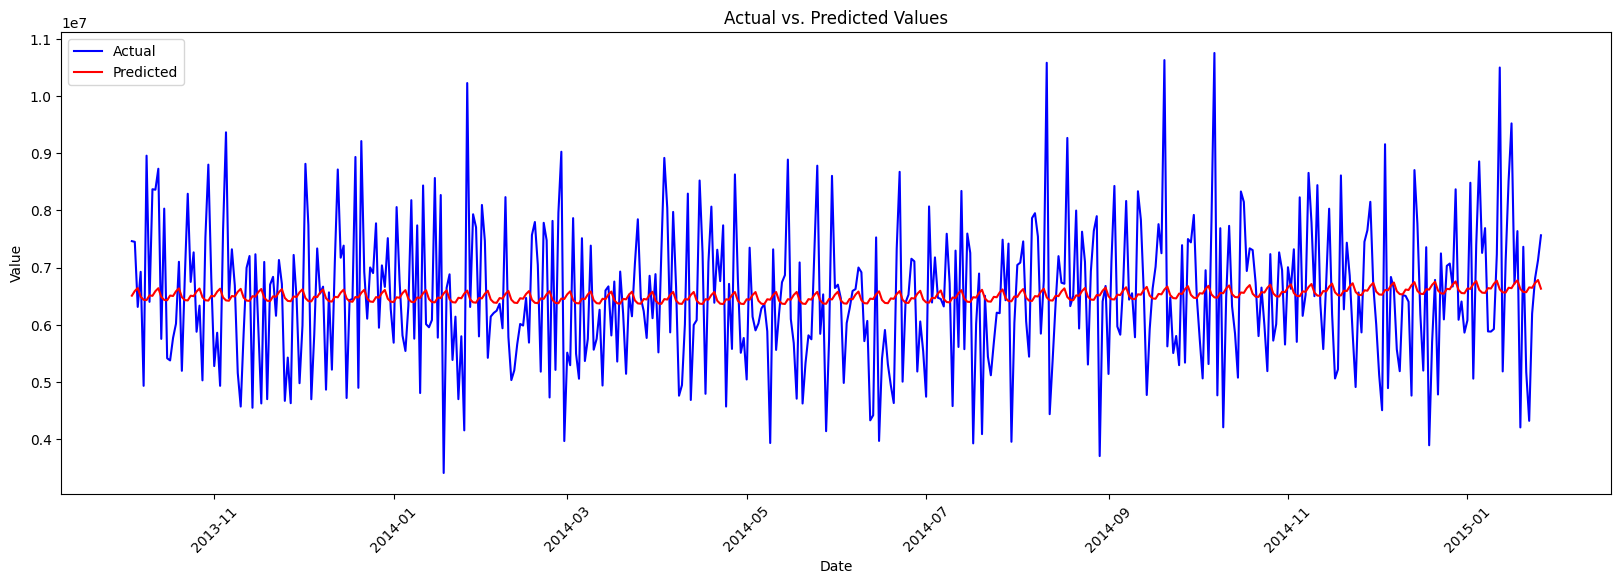

In [ ]:

plt.figure(figsize=(20,6))
# Plot the original values (actual_values)
plt.plot(train_data['ds'], actual_values, label='Actual', color='b')

# Plot the predicted values (predicted_values)
plt.plot(forecast['ds'], predicted_values, label='Predicted', color='r')

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xticks(rotation=45)
# Show the plot
plt.show()


In [ ]:
forecast = model.predict(test_data)

# Extract the actual values from your test_data and sort by 'ds'
actual_values = test_data.sort_values(by='ds')['y'].values

# Extract the predicted values from the forecast and sort by 'ds'
predicted_values = forecast.sort_values(by='ds')['yhat'].values

# Truncate the predicted_values to match the length of actual_values
predicted_values = predicted_values[:len(actual_values)]

# Calculate MAE and MAPE between test_data and predicted values
mae = mean_absolute_error(actual_values, predicted_values)
mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 930347.0501381058
MAPE: 15.613703059130623


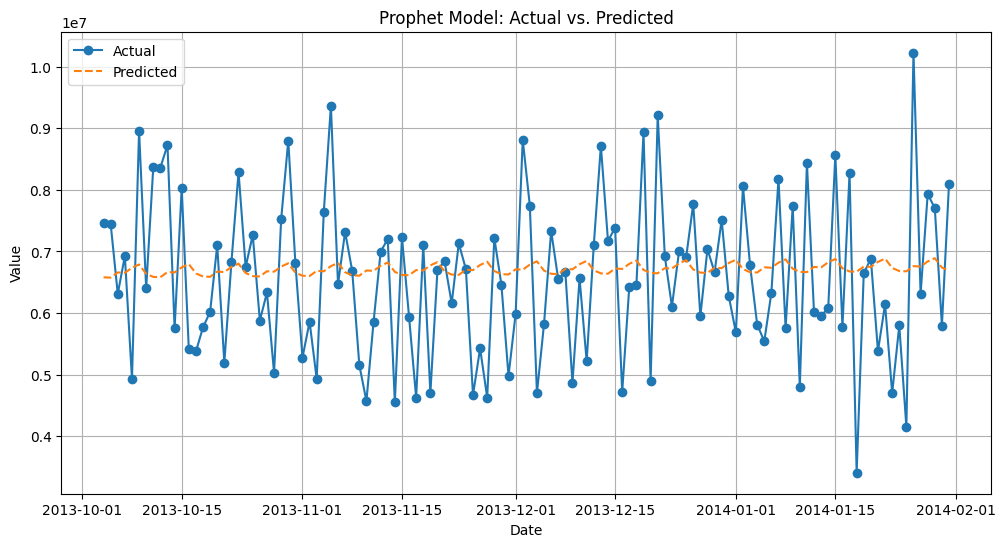

In [ ]:
import matplotlib.pyplot as plt

# Make sure the predicted_values and train_data['ds'] have the same length
num_elements = min(len(predicted_values), len(train_data['ds']))
predicted_values_trimmed = predicted_values[:num_elements]
dates_for_plotting = train_data['ds'][:num_elements]

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(dates_for_plotting, train_data['y'][:num_elements], label='Actual', marker='o')

# Plot the trimmed predicted values (in-sample)
plt.plot(dates_for_plotting, predicted_values_trimmed, label='Predicted', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()



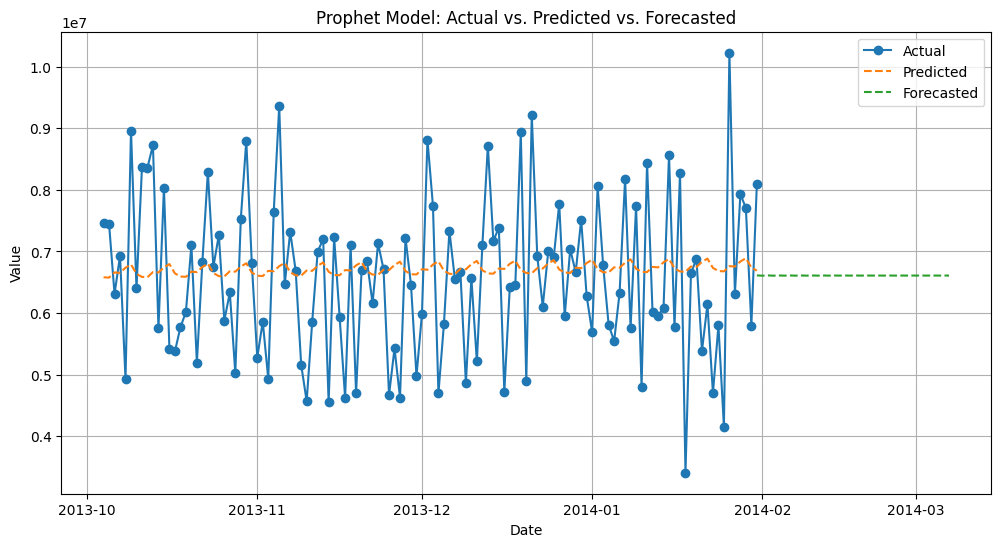

In [ ]:
import matplotlib.pyplot as plt

# Make sure the predicted_values_trimmed and train_data['ds'] have the same length
num_elements = min(len(predicted_values_trimmed), len(train_data['ds']))
predicted_values_trimmed = predicted_values_trimmed[:num_elements]
dates_for_plotting = train_data['ds'][:num_elements]

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(dates_for_plotting, train_data['y'][:num_elements], label='Actual', marker='o')

# Plot the trimmed predicted values (in-sample)
plt.plot(dates_for_plotting, predicted_values_trimmed, label='Predicted', linestyle='--')

# Extract the forecasted values for the next 36 periods
forecasted_values = forecast[-36:]  # Extract the last 36 forecasted values

# Generate dates for the forecasted values starting from where predicted values end
forecast_dates = pd.date_range(start=dates_for_plotting.max(), periods=36, freq='D')

# Plot the forecasted values
plt.plot(forecast_dates, forecasted_values, label='Forecasted', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model: Actual vs. Predicted vs. Forecasted')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Create a pandas series with the data
series = pd.Series(train_data['y'])

# Perform Holt-Winters forecasting
model = ExponentialSmoothing(series, seasonal_periods=7, trend='add', seasonal='mul')
fit_model = model.fit()

# Forecast the next 36 values
forecast = fit_model.forecast(36)

# Print the forecasted values
print(forecast)

480    6.646516e+06
481    6.687934e+06
482    6.785053e+06
483    6.753861e+06
484    6.811025e+06
485    7.073504e+06
486    6.724226e+06
487    6.684469e+06
488    6.726093e+06
489    6.823734e+06
490    6.792333e+06
491    6.849791e+06
492    7.113732e+06
493    6.762436e+06
494    6.722422e+06
495    6.764251e+06
496    6.862415e+06
497    6.830805e+06
498    6.888557e+06
499    7.153959e+06
500    6.800646e+06
501    6.760376e+06
502    6.802410e+06
503    6.901096e+06
504    6.869277e+06
505    6.927324e+06
506    7.194186e+06
507    6.838856e+06
508    6.798329e+06
509    6.840569e+06
510    6.939778e+06
511    6.907749e+06
512    6.966090e+06
513    7.234414e+06
514    6.877066e+06
515    6.836282e+06
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
actual_values = train_data['y'][-36:]
mae = mean_absolute_error(actual_values, forecast)
print("MAE:", mae)
mape = mean_absolute_percentage_error(actual_values, forecast) * 100
print("MAPE:", mape)

MAE: 1122721.8778085758
MAPE: 17.583081005491106


In [ ]:
forecast = model_fit.forecast(steps=len(test_data))

# Extract the actual values from your test_data
actual_values = test_data['y'].values

# Calculate MAE and MAPE between test_data and predicted values
mae = mean_absolute_error(actual_values, forecast)
mape = mean_absolute_percentage_error(actual_values, forecast) * 100

print("MAE:", mae)
print("MAPE:", mape)

MAE: 918595.5430557006
MAPE: 15.17505453634192


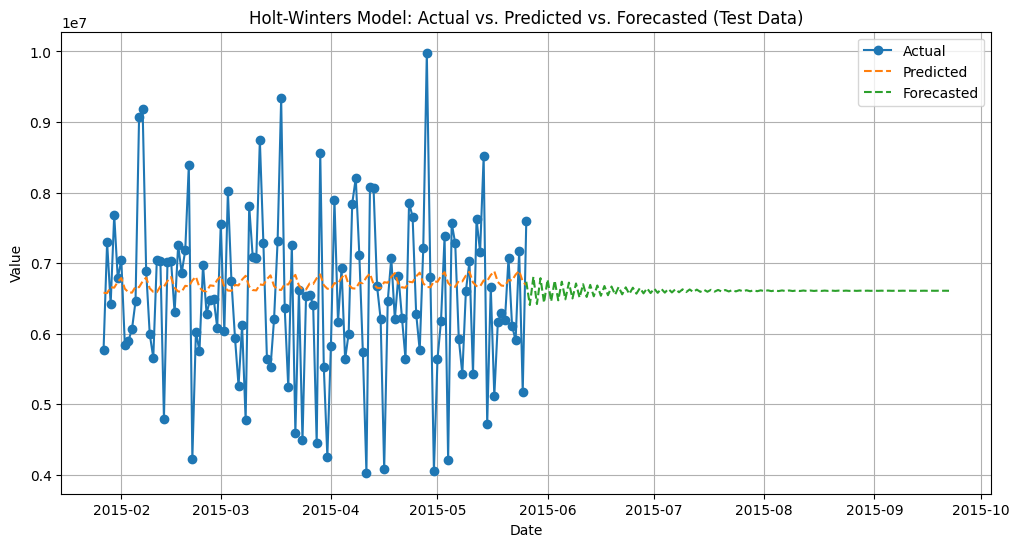

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], actual_values, label='Actual', marker='o')

# Plot the predicted values
plt.plot(test_data['ds'], predicted_values, label='Predicted', linestyle='--')

# Plot the forecasted values
forecast_dates = pd.date_range(start=test_data['ds'].max(), periods=len(predicted_values), freq='D')
plt.plot(forecast_dates, forecast, label='Forecasted', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Holt-Winters Model: Actual vs. Predicted vs. Forecasted (Test Data)')
plt.legend()
plt.grid(True)
plt.show()
